<a href="https://colab.research.google.com/github/FurkanMistry/ImageClassificationCNN/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Image classification using CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

170508288/170498071 [==============================] - 3s 0us/step


TypeError: ignored

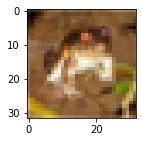

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape



X_test.shape



y_train[:5]



y_test = y_test.reshape(-1,)



classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])



plot_sample(X_train, y_train, 0)

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.8125 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6233 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5419 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4790 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4315 - accuracy: 0.4984


In [5]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))



Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.67      0.55      1000
           1       0.62      0.62      0.62      1000
           2       0.37      0.31      0.34      1000
           3       0.37      0.40      0.38      1000
           4       0.35      0.56      0.43      1000
           5       0.51      0.21      0.30      1000
           6       0.55      0.45      0.49      1000
           7       0.60      0.46      0.52      1000
           8       0.60      0.63      0.61      1000
           9       0.55      0.56      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [6]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)



Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4419 - accuracy: 0.4790
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0988 - accuracy: 0.6139
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9692 - accuracy: 0.6606
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8854 - accuracy: 0.6947
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8171 - accuracy: 0.7160
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7676 - accuracy: 0.7328
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7232 - accuracy: 0.7471
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6800 - accuracy: 0.7611
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6485 - accuracy: 0.7753
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [8]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.9026 - accuracy: 0.6977


[0.9025672674179077, 0.697700023651123]

In [9]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0489790e-03, 2.4041187e-04, 8.0946339e-03, 9.0439761e-01,
        5.9750011e-05, 7.8086793e-02, 5.4720021e-03, 7.3832623e-04,
        6.4105674e-04, 1.2204583e-03],
       [8.1418730e-02, 6.5373456e-01, 2.1971696e-06, 4.3686932e-06,
        3.0330479e-08, 1.1992930e-07, 4.1770267e-09, 1.0582179e-07,
        2.6408541e-01, 7.5441686e-04],
       [4.1044910e-02, 1.4091167e-01, 3.1318846e-03, 4.5315220e-04,
        8.5144088e-04, 2.2052063e-04, 1.5236047e-05, 6.0613574e-03,
        8.0225617e-01, 5.0536101e-03],
       [9.7066218e-01, 2.3273896e-02, 4.7753477e-03, 2.0358634e-04,
        1.1965062e-04, 9.4641091e-06, 7.2442985e-04, 1.6869089e-05,
        1.9815429e-04, 1.6424550e-05],
       [1.6308890e-06, 1.6748623e-04, 3.3682682e-02, 1.5517860e-02,
        2.4568164e-01, 9.6119329e-04, 7.0384103e-01, 2.0310956e-06,
        1.4175006e-04, 2.7702490e-06]], dtype=float32)

In [10]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [11]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

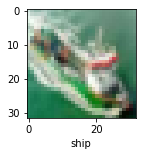

In [18]:
plot_sample(X_test, y_test,15)

In [19]:
classes[y_classes[15]]

'ship'